# ECON526: Quantitative Economics with Data Science Applications

Uncertainty Quantification in Applied Economics

Phil Solimine (University of British Columbia)

# Overview

## Summary

-   Last class, we covered the meaning of causal effects and some of the
    challenges of estimating them from observational data.

-   Today, we will discuss how we measure the uncertainty associated
    with our estimates of causal effects.

-   We will also introduce the bias-variance tradeoff and how it relates
    to the uncertainty of our estimates.

# Bias

## Bias

-   Remember that the bias of an estimator is the difference between the
    **expected value of the estimator** and the **true value of the
    parameter** we are trying to estimate.

-   There are a number of types of bias that can arise in our
    estimators.

-   In causal inference, we are often interested in the ATE or ATT.

    -   Much of the discussion of bias in causal inference is focused on
        the bias of estimators of these quantities.
    -   The estimator we are usually concerned about is the difference
        in sample means between the treatment and control groups.
    -   This particular bias is given by the formula
        $E[Y\mid T=1] - E[Y\mid T=0] = \text{ATT} + E[Y_0\mid T=1] - E[Y_0\mid T=0]$

## Bias

-   Some types of bias are due to the fact that we are using an
    estimator that is not the best one for the parameter we are trying
    to estimate.
    -   These types of bias can often be fixed by getting more data, or
        by tweaking the estimator itself.
    -   For example, while
        $\hat{\sigma}^2 = \frac{1}{n}\sum_{i=1}^{n} (x-\bar{x})^2$ seems
        like a natural estimator for the variance of a random variable
        $x$, it’s expected value is actually
        $E[\hat{\sigma}^2]=\frac{n-1}{n}\sigma^2 = \sigma^2 - \frac{1}{n}\sigma^2\leftarrow \text{(bias)}$.
    -   We can fix this by using
        $\frac{1}{n-1}\sum_{i=1}^n (x-\bar{x})^2$ instead. (The Bessel
        correction)
    -   Note that $\lim_{n\rightarrow \infty} \frac{1}{n} = 0$, so this
        bias term vanishes as we get more data. This type of estimator
        is called **consistent**.

## Bias

-   Now look back at the formula $$ 
      E[Y\mid T=1] - E[Y\mid T=0] = \text{ATT} + \underbrace{E[Y_0\mid T=1] - E[Y_0\mid T=0]}_{\text{bias}}
      $$

-   Notice that there is nothing about this bias term that will force it
    to go to zero as we get more data.

-   These types of bias, like **omitted variable bias**, and **selection
    bias** are more due to the fact that we are ignoring some important
    aspect of the data-generating process, therefore they can’t be fixed
    by simply getting more data.

# Standard Errors

## Standard Errors

-   Usually the estimators we study are based on sample averages of
    random variables.
    -   If we don’t have a lot of data, and the data-generating process
        has a lot of variation, then our sample average will be very
        sensitive to the particular sample we draw.
    -   As we get more data, the sample average will be closer to the
        true mean and less sensitive to the particular sample we draw.
-   The equation for the standard error of a sample average is:
    $\text{SE} = \frac{\sigma}{\sqrt{n}}$
    -   Where $\sigma$ is the standard deviation of the random variable
        and $n$ is our sample size.
    -   This is called Moivre’s equation

# Example: School Size and Academic Performance in Brazil

## Standard Errors

-   The standard error of a sample average is a measure of the
    uncertainty of our estimate of the true mean.

-   To see why this might be important, let’s look at an example.

-   For this, we will use a dataset that contains ENEM scores for
    students in Brazil, from different schools, over a three year time
    period.

In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

In [3]:
df = pd.read_csv("./data/enem_scores.csv")
df.sort_values(by="avg_score", ascending=False).head(5)

## Standard Errors - Example

-   We want to discover if there is a relationship between school
    quality and student performance.
-   As a first step, let’s split out the top 1% of schools by average
    score, and compare the number of students in those schools to the
    number of students in the rest of the schools.

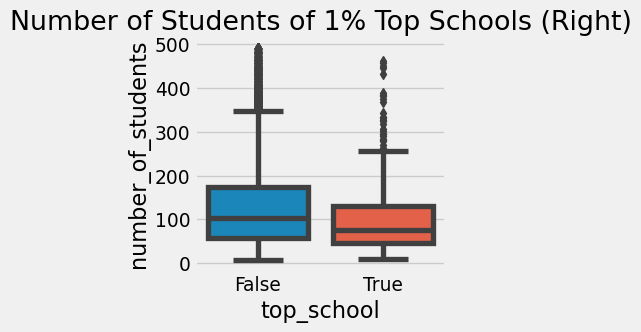

In [4]:
plot_data = (df
  .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
  [["top_school", "number_of_students"]]
  .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}")) # remove outliers

plt.figure(figsize=(3,3))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data)
plt.title("Number of Students of 1% Top Schools (Right)");

## Standard Errors - Example

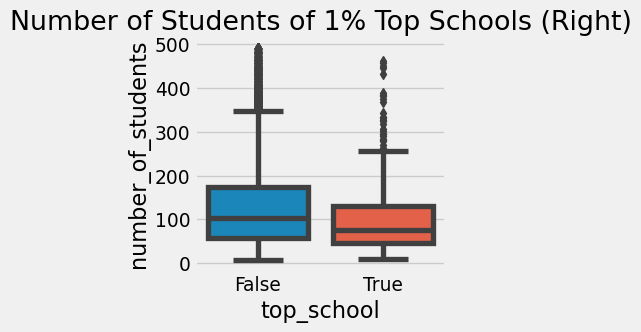

In [5]:
plot_data = (df
  .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
  [["top_school", "number_of_students"]]
  .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}")) # remove outliers

plt.figure(figsize=(3,3))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data)
plt.title("Number of Students of 1% Top Schools (Right)");

-   We can see that the top 1% of schools have a lot fewer students than
    the rest of the schools.

-   This might lead us to draw some conclusions, like “smaller schools
    are better”.

## Standard Errors - Example

-   Now let’s take a look at the full distribution of scores by school
    size.

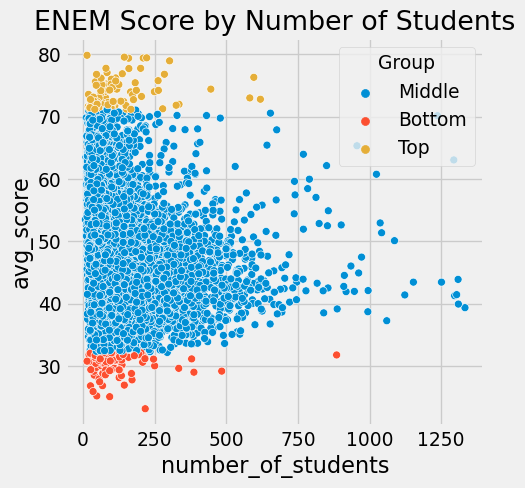

In [6]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
  .sample(10000)
  .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
    ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(5,5))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data)
plt.title("ENEM Score by Number of Students");

## Standard Errors - Example

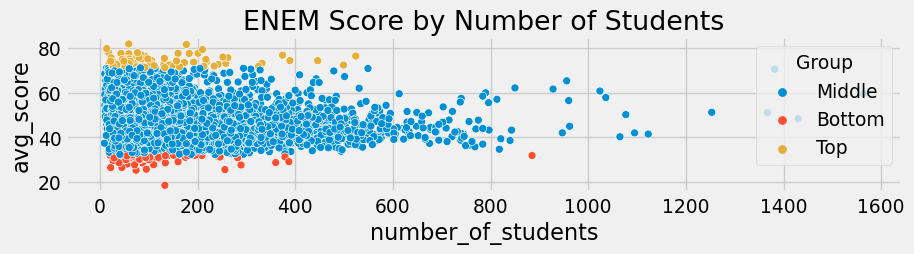

In [7]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
  .sample(10000)
  .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
    ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(10,2))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data)
plt.title("ENEM Score by Number of Students");

-   This captures exactly what we would expect if there was no
    relationship between school size and student performance.

-   Our false conclusion is a direct result of the formula
    $\text{SE} = \frac{\sigma}{\sqrt{n}}$.

-   Since each observation in our dataset is a *sample average*, the
    schools with a lot of students give very precise estimates of the
    true mean, while the schools with fewer students give noisier
    estimates.

# Example: An Evaluation of Online Learning

## Standard Errors in a Causal Context

-   Let’s return to causal inference.

-   We will explore the following data, which contain the results of an
    RCT that randomized students into online and face-to-face sections
    of a course.

-   This dataset contains observations of 323 students who were
    randomized into three different class formats. It comes from:

    -   Alpert et al. 2016 *AER*. A Randomized Assessment of Online
        Learning.

In [8]:
data = pd.read_csv("./data/online_classroom.csv")
data.head(3)

## Standard Errors in a Causal Context

-   Since these data come from an RCT, we can estimate the ATE by simply
    comparing the average scores of the different treatment groups.

In [9]:
(data
 .assign(class_format = np.select(
  [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
    ["online", "blended"],
    default="face_to_face"
 ))
 .groupby(["class_format"])
 .mean())

## Standard Errors in a Causal Context

In [10]:
(data
 .assign(class_format = np.select(
  [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
    ["online", "blended"],
    default="face_to_face"
 ))
 .groupby(["class_format"])
 .mean())

-   For reference, the averages of these variables are:

In [11]:
data.mean().to_frame().T

## Standard Errors in a Causal Context

-   Now let’s take a closer look at the average scores by treatment
    group.

In [12]:
exam_scores = (data
 .assign(class_format = np.select(
  [data["format_ol"].astype(bool), data["format_blended"].astype(bool)],
    ["online", "blended"],
    default="face_to_face"
 ))
 .groupby(["class_format"])
 .mean())["falsexam"]
exam_scores

class_format
blended         77.093731
face_to_face    78.547485
online          73.635263
Name: falsexam, dtype: float64

-   Since these data come from an RCT, we can estimate the ATE by simply
    comparing the average scores of the different treatment groups,
    relative to the control group (face-to-face).

In [13]:
print(f"Online format changed test scores by {(exam_scores['online'] - exam_scores['face_to_face']):.4} points.")
print(f"Blended format changed test scores by {(exam_scores['blended'] - exam_scores['face_to_face']):.4} points.")

Online format changed test scores by -4.912 points.
Blended format changed test scores by -1.454 points.

## Standard Errors in a Causal Context

-   Online format decreased test scores by almost 5 points, while the
    blended format decreased test scores by almost 2 points.
    -   *Relative* to the face-to-face format.
-   But because of the relatively small sample, there’s a chance that
    our estimates are wrong.
    -   We can use the standard error of the sample average to quantify
        the uncertainty of our estimates.
    -   Having a low standard error (relative to the size of the effect)
        gives us more *confidence* that the estimate is correct.

In [14]:
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]
def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))

print(f"SE for Online: {se(online):.3} points")
print(f"SE for Face to Face: {se(face_to_face):.3} points")

SE for Online: 1.54 points
SE for Face to Face: 0.872 points

# Confidence Intervals

## Confidence Intervals

-   We can use the standard error of the sample average to construct a
    **confidence interval** around our estimate.

-   A confidence interval is a range of values that we are confident
    contains the true value of the parameter we are trying to estimate.

-   The confidence interval is constructed by taking the sample average
    and adding and subtracting a multiple of the standard error.

    -   The multiple we use is determined by *how* confident we want to
        be that the true value is in the interval.
    -   If the estimator takes a normal distribution, then we can use
        the quantiles of the normal distribution to determine the
        multiple.

## Confidence Intervals

-   Let’s suppose we have a true abstract distribution of students’ test
    scores to better grasp this.
-   Imagine it is a normal distribution with a true mean of 74 and a
    true standard deviation of 2.
-   We can simulate a sample of 500 students from this distribution and
    calculate the sample average.

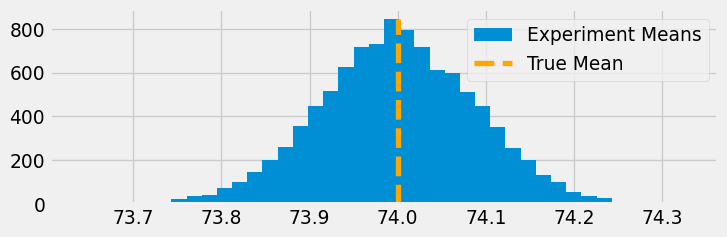

In [15]:
def run_experiment(): 
    return np.random.normal(74, 2, 500)

np.random.seed(42)

plt.figure(figsize=(8,2.5))
freq, bins, img = plt.hist([run_experiment().mean() for _ in range(10000)], bins=40, label="Experiment Means")
plt.vlines(74, ymin=0, ymax=freq.max(), linestyles="dashed", label="True Mean", color="orange")
plt.legend();

## Aside: Central Limit Theorem

-   Let’s try the same thing, but with the data coming from a uniform
    distribution.

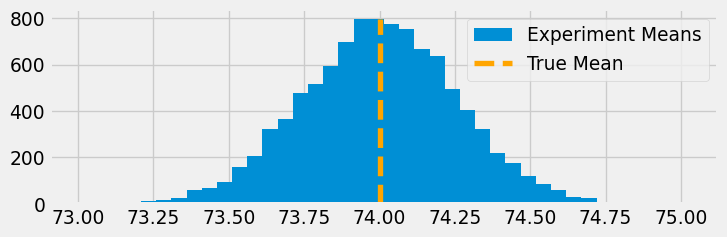

In [16]:
def run_experiment_unif(): 
    return np.random.uniform(64, 84, 500)

np.random.seed(42)

plt.figure(figsize=(8,2.5))
freq, bins, img = plt.hist([run_experiment_unif().mean() for _ in range(10000)], bins=40, label="Experiment Means")
plt.vlines(74, ymin=0, ymax=freq.max(), linestyles="dashed", label="True Mean", color="orange")
plt.legend();

-   In fact, the **central limit theorem** tells us that the sample
    average of *any* \* distribution will be normally distributed as the
    sample size gets large.
    -   \*As long as the mean and variance of the distribution are
        finite.

## Confidence Intervals

-   Of course, usually we won’t have the luxury of simulating our
    experiment thousands of times to get a sense of the distribution of
    our estimator.

-   But we can use the CLT, and the approximate normality of the sample
    mean, to construct a confidence interval around our estimate.

-   Confidence intervals are coupled with a probability (usually 90%,
    95%, or 99%).

    -   This probability tells us the percentage of times that we would
        expect an experiment to produce an estimate within the interval.

## Confidence Intervals

-   These confidence intervals would look something like this:

(73.82718114045632, 74.17341543460314)

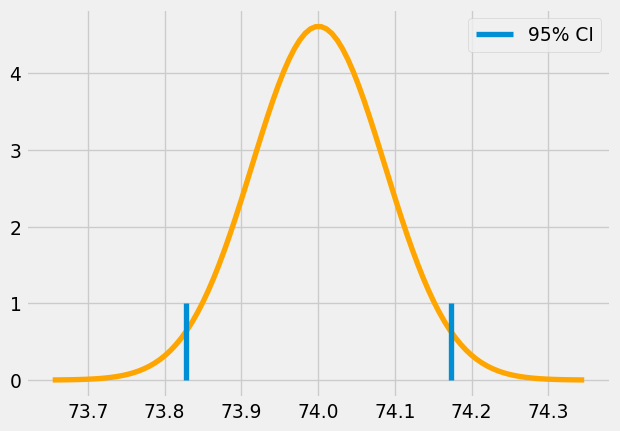

In [17]:
np.random.seed(321)
exp_data = run_experiment()
exp_se = exp_data.std() / np.sqrt(len(exp_data))
exp_mu = exp_data.mean()
ci = (exp_mu - 2 * exp_se, exp_mu + 2 * exp_se)
print(ci)
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y, color="orange")
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="95% CI")
plt.legend()
plt.show()

## Confidence Intervals

-   Back to our classroom experiment, we can construct the confidence
    interval for the mean exam score in both online and face-to-face
    formats.

In [18]:
def ci(y: pd.Series):
    return (y.mean() - 2 * se(y), y.mean() + 2 * se(y))

print("95% CI for Online:", ci(online))
print("95% for Face to Face:", ci(face_to_face))

95% CI for Online: (70.56094429049804, 76.7095818797147)
95% for Face to Face: (76.80278229206951, 80.29218687459715)

-   Not only are the means different, but the confidence intervals also
    do not overlap.
    -   This gives us a good amount of certainty that online format
        actually does decrease test scores.

## Confidence Intervals

-   Without confidence intervals, point estimates are not very useful.
    -   We can’t tell if the difference between the means is due to
        chance or not.
    -   We can’t tell if the difference is large or small.
    -   Therefore some measure of uncertainty should *always* be
        reported along with the point estimate.
-   A common mistake is to interpret the confidence interval as the
    probability that the true value is in the interval.
    -   This is not technically correct.
    -   The true value is either in the interval or it is not.
    -   Really, the confidence interval should be interpreted as the
        frequency with which the interval would contain the true value,
        if the experiment were repeated many times.

# Hypothesis Testing

## Hypothesis Testing

-   Another way to quantify the uncertainty of our estimates is to use
    **hypothesis testing**.
    -   Is the difference in means statistically different from zero (or
        some other value)?
-   Recall that the sum or difference of two independent normal random
    variables is also normally distributed.
    -   Therefore, we can use the CLT to construct a test statistic that
        is normally distributed.
-   The resulting mean will be the sum or difference between the two
    distributions, while the variance will always be the sum of the
    variance:
    -   $N(\mu_1, \sigma_1^2) - N(\mu_2, \sigma_2^2) = N(\mu_1 - \mu_2, \sigma_1^2 + \sigma_2^2)$
    -   $N(\mu_1, \sigma_1^2) + N(\mu_2, \sigma_2^2) = N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)$

## Hypothesis Testing

-   Hypothesis testing is another way to quantify the uncertainty of our
    estimates.
    -   It is very closely related to confidence intervals.
-   If we have two normal distributions, and want to test if the
    difference between the means is zero, we can construct a test
    statistic that is normally distributed.
    -   $\mu_{diff} = \mu_1 - \mu_2$
    -   $SE_{diff} = \sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}$

## Hypothesis Testing

-   Returning to our classroom experiment, we can construct a hypothesis
    test to determine if the difference in means is different from zero.

-   The null hypothesis is that the difference in means is zero.

    -   $H_0: \mu_{online} - \mu_{face-to-face} = 0$

-   The alternative hypothesis is that the difference in means is not
    zero.

    -   $H_1: \mu_{online} - \mu_{face-to-face} \neq 0$

-   Notice that the alternative hypothesis is not that the difference is
    *positive* or *negative*.

    -   This is because we are using a two-sided test.
    -   We are testing if the difference is *different* from zero, not
        if it is *greater* or *less* than zero.
    -   Also, notice that the hypotheses are mutually exclusive and
        collectively exhaustive.

## Hypothesis Testing

In [19]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
ci = (diff_mu - 1.96*diff_se, diff_mu + 1.96*diff_se)
print(ci)

(-8.376410208363385, -1.4480327880905248)

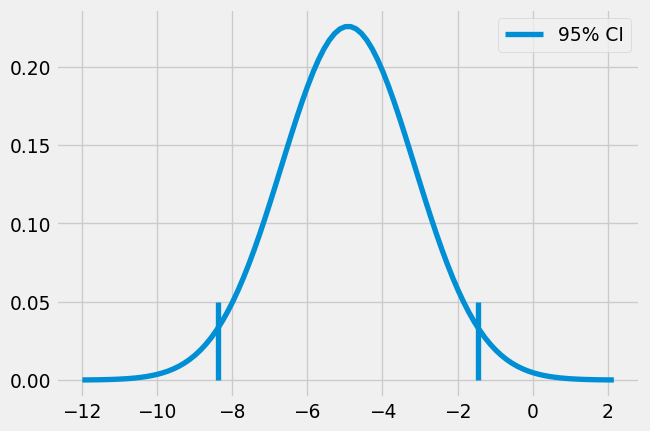

In [20]:
x = np.linspace(diff_mu - 4*diff_se, diff_mu + 4*diff_se, 100)
y = stats.norm.pdf(x, diff_mu, diff_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=.05)
plt.vlines(ci[0], ymin=0, ymax=.05, label="95% CI")
plt.legend()
plt.show()

## Hypothesis Testing

-   Based on the results, we can see that based on our original standard
    errors, we are 95% confident that the true difference in means is
    between -8.37 and -1.63.

-   Therefore, we can reject the null hypothesis that the difference in
    means is zero, at the 5% level.

-   Alternatively, we can say that the difference in means is
    *statistically significant at the 5% level*.

## Hypothesis Testing

-   We can also construct a z-statistic to test the null hypothesis.
    -   $z = \frac{\mu_{diff} - H_0}{SE_{diff}} = \frac{\mu_1 - \mu_2 -0 }{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}$
-   The z-statistic is the number of standard errors that the difference
    in means is from the null hypothesis.
-   Under the null hypothesis, the z-statistic is normally distributed
    with mean zero and variance one.
    -   $z \sim N(0,1)$
-   Therefore, we can simply calculate the z-statistic and compare it to
    the quantiles of the normal distribution to determine if the
    difference in means is statistically significant.

# P-Values

## P-Values

-   With all of the previous methods, we have been able to answer
    yes-or-no questions about our estimates.
    -   Is the difference in means statistically different from zero at
        the 95% level?
    -   Is the difference in means statistically significant at the 5%
        level?
-   However, a more useful question might be *how* different are the
    means?
    -   Is the difference in means large or small?
    -   Is the difference in means practically significant?
-   To answer these questions, we can use **p-values**.

## P-Values

-   The p-value is the probability of observing a test (z) statistic at
    least as extreme as the one we calculate, *if the null hypothesis is
    true*.

-   P-values allow us to quantify uncertainty without needing to specify
    a confidence level.

    -   We can simply report the p-value and let the reader decide what
        level of uncertainty they are comfortable with.

-   The p-value is calculated by taking the area under the normal
    distribution curve that is more extreme than the test statistic.

    -   The p-values is *not* the probability that the null hypothesis
        is true ($P(H_0)\mid data$).
    -   Instead it is the probability of observing the data, under the
        null ($P(data)\mid H_0$).

## P-Values

-   Let’s calculate the p-value for our classroom experiment.

In [21]:
z = diff_mu / diff_se
p_value = 2 * (1 - stats.norm.cdf(z))
print(f"z-statistic: {z:.3}")
print(f"p-value: {p_value:.3}")

z-statistic: -2.78
p-value: 1.99

-   The p-value of 0.0027 tells us that we can reject the null
    hypothesis at the 5% level.
    -   The difference in means is statistically significant at the 5%
        level. (The 95% confidence interval does not contain zero.)
    -   In fact, we could reject the null hypothesis at the 1% level as
        well. (The 99% confidence interval does not contain zero.)
    -   However, we could not reject the null hypothesis at the 0.1% (or
        0.2%) level. (The 99.9% confidence interval does contain zero.)

# The Bias-Variance Tradeoff

## The Bias-Variance Tradeoff

-   The bias-variance tradeoff is a fundamental concept in statistics
    and machine learning.

-   There is a often a tradeoff between the bias and variance of an
    estimator.

    -   An estimator with low bias will have high variance.
    -   An estimator with low variance will have high bias.

-   While we generally want to minimize both bias and variance, it can
    often be the case that introducing a little bias will reduce the
    variance of the estimator by a large amount.

## The Bias-Variance Tradeoff

-   Let’s look at an example.

-   Rembember our first example of a biased estimator, the sample
    variance.

-   The simple sample variance (without the Bessel correction) is biased
    because
    $E[\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2] = \frac{n-1}{n}\sigma^2$.

    -   The bias term is $\frac{1}{n}\sigma^2$.

-   For an unbiased estimator, we simply need to replace $\frac{1}{n}$
    with $\frac{1}{n-1}$.

    -   This gets rid of the bias term, and it is still consistent
        (since the difference between $\frac{1}{n}$ and $\frac{1}{n-1}$
        goes to zero as $n$ gets large).

## The Bias-Variance Tradeoff

-   Let’s consider instead the whole class of estimators of the form
    $\hat{\sigma}_c^2 = c \sum_{i=1}^n (x_i - \bar{x})^2$.
    -   The simple sample variance is the special case where
        $c = \frac{1}{n}$.
    -   The unbiased sample variance is the special case where
        $c = \frac{1}{n-1}$.
-   Remember that
    $E[\hat{\sigma}_\frac{1}{n}^2] = \frac{n-1}{n}\sigma^2$.
    -   The bias term is $\frac{1}{n}\sigma^2$.
    -   We can use the linearity of expectation to calculate the bias of
        any estimator of this form.
    -   $E[\hat{\sigma}_c^2] = c (n-1) \sigma^2$.
-   Therefore, in order to minimize the bias, we need to choose
    $c = \frac{1}{n-1}$.

## The Bias-Variance Tradeoff

-   However, we can also calculate the variance of this estimator.
    -   $Var(\hat{\sigma}_c^2) = 2c^2 \sigma^4 (n-1)$
-   Instead of finding the value of $c$ that minimizes the bias, we can
    find the value of $c$ that minimizes the variance (MSE) of the
    estimator.
    -   $MSE(\hat{\sigma}^2_c) = E[(\hat{\sigma}_c^2 - \sigma^2)^2] = E[\hat{\sigma}_c^2 - \sigma^2]^2 + Var(\hat{\sigma}_c^2)$
    -   ($Var(\hat{\sigma}_c^2)$ is the variance of the estimator, or
        the square of its standard error.)
    -   Plugging in our formula for the variance,
        $MSE(\hat{\sigma}^2_c) = (c(n-1)-1)^2 \sigma^4 + 2c^2 \sigma^4 (n-1)$.
-   If we wanted to minimize the standard error of the estimate, instead
    of the bias, minimizing this standard error would actually lead us
    to choose $c = \frac{1}{n+1}$.

## The Bias-Variance Tradeoff

-   Let’s plot the bias and variance of the estimator for different
    values of $c$.

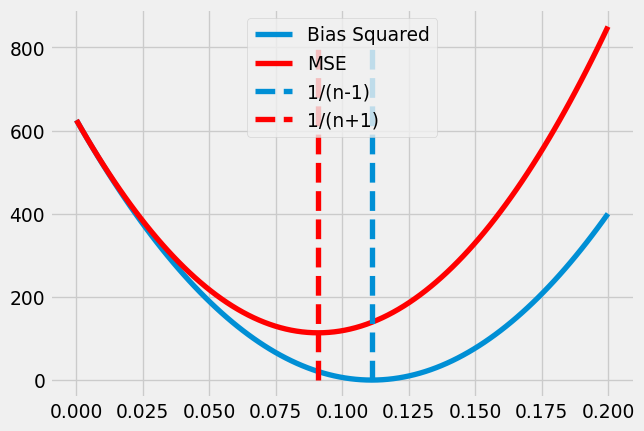

In [22]:
def bias_sq(c,sigma=5,n=10):
    return (c * (n-1)-1)**2 * sigma**4

def mse(c,sigma=5,n=10):
    return (c*(n-1)-1)**2 * sigma**4 + 2 * c**2 * sigma**4 * (n-1)

n = 10
sigma = 5
c = np.linspace(0, 0.2, 100)
plt.plot(c, bias_sq(c), label="Bias Squared")
plt.plot(c, mse(c), label="MSE", color = "red")
plt.vlines(1/(n-1), ymin=0, ymax=800, linestyles="dashed", label="1/(n-1)")
plt.vlines(1/(n+1), ymin=0, ymax=800, linestyles="dashed", color = "red", label="1/(n+1)")

plt.legend()
plt.show()

## The Bias-Variance Tradeoff

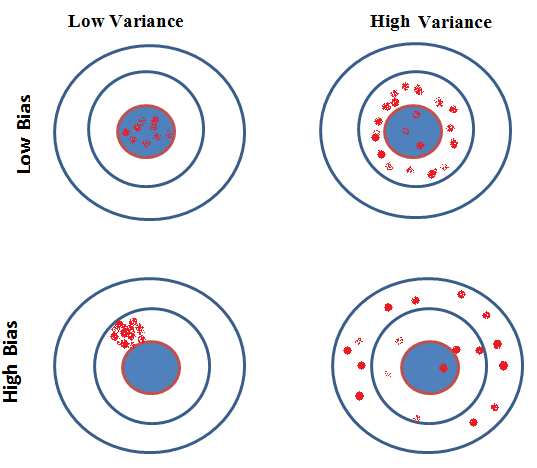

## The Bias-Variance Tradeoff

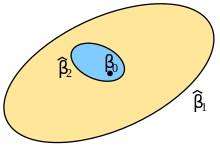